In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Load the datasets
comments_df = pd.read_csv("comments.csv")
finance_df = pd.read_csv("destription+finance.csv")

In [3]:
# --- Step 1: Basic Info ---
print("📘 COMMENTS DATA")
print(comments_df.info())
print(comments_df.describe(include='all'))

print("\n📗 FINANCE DATA")
print(finance_df.info())
print(finance_df.describe(include='all'))

📘 COMMENTS DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223228 entries, 0 to 223227
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_name      223228 non-null  object
 1   comment        223227 non-null  object
 2   time_posted    223228 non-null  object
 3   likes          223228 non-null  int64 
 4   comment_id     223228 non-null  object
 5   token_address  223228 non-null  object
 6   token_name     223228 non-null  object
 7   token_ticker   223228 non-null  object
dtypes: int64(1), object(7)
memory usage: 13.6+ MB
None
       user_name comment time_posted          likes comment_id  \
count     223228  223227      223228  223228.000000     223228   
unique     53018  179748         279            NaN          1   
top      pfungod     LFG  30/09/2024            NaN    [reply]   
freq         696     776        5873            NaN     223228   
mean         NaN     NaN         NaN       3.432

In [4]:
# --- Step 2: Cleaning ---
# Convert date columns
comments_df['time_posted'] = pd.to_datetime(comments_df['time_posted'], format="%d/%m/%Y", errors='coerce')
finance_df['createdAt'] = pd.to_datetime(finance_df['createdAt'], format="%d/%m/%Y, %H:%M:%S", errors='coerce')
finance_df['bonding_completeTime'] = pd.to_datetime(finance_df['bonding_completeTime'], format="%d/%m/%Y, %H:%M:%S", errors='coerce')

# Clean mCap
finance_df['mCap'] = finance_df['mCap'].str.replace(',', '', regex=False).astype(float)

# Fill missing description
finance_df['description'] = finance_df['description'].fillna("No description")

In [5]:
# --- Step 3: Missing Values ---
print("\nMissing values in comments dataset:\n", comments_df.isnull().sum())
print("\nMissing values in finance dataset:\n", finance_df.isnull().sum())


Missing values in comments dataset:
 user_name         0
comment           1
time_posted      42
likes             0
comment_id        0
token_address     0
token_name        0
token_ticker      0
dtype: int64

Missing values in finance dataset:
 token_name              0
token_ticker            0
token_address           0
description             0
mCap                    0
createdAt               0
bonding_completeTime    0
dtype: int64


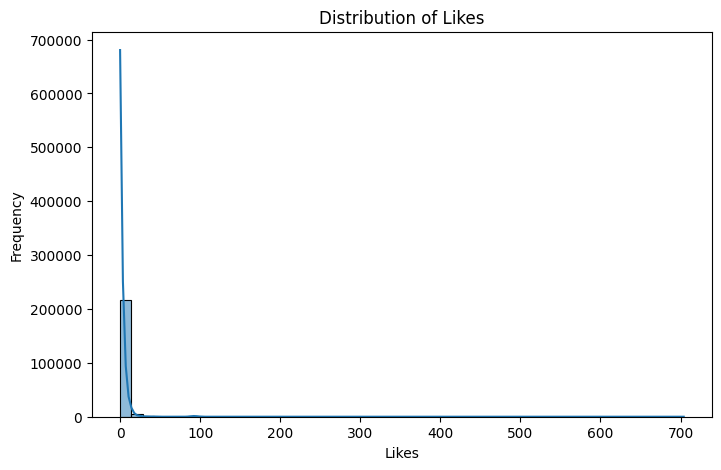

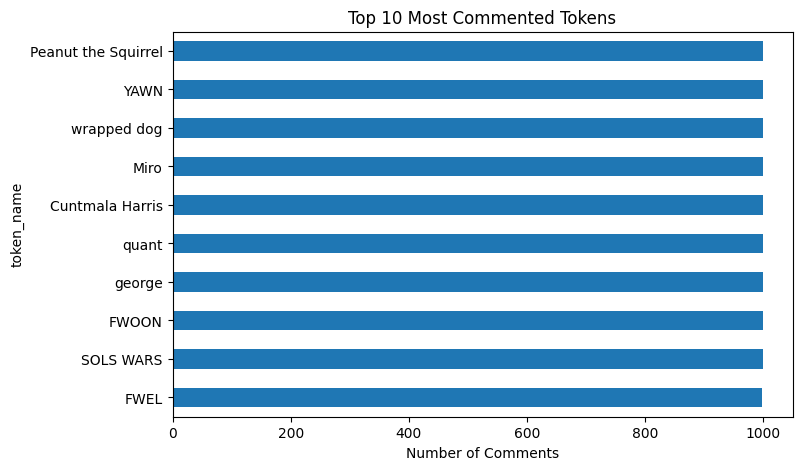

In [6]:
# --- Step 4: Univariate Analysis ---
# Plot likes distribution
plt.figure(figsize=(8,5))
sns.histplot(comments_df['likes'], bins=50, kde=True)
plt.title("Distribution of Likes")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()

# Most commented tokens
top_commented = comments_df['token_name'].value_counts().head(10)
top_commented.plot(kind='barh', title="Top 10 Most Commented Tokens", figsize=(8,5))
plt.xlabel("Number of Comments")
plt.gca().invert_yaxis()
plt.show()


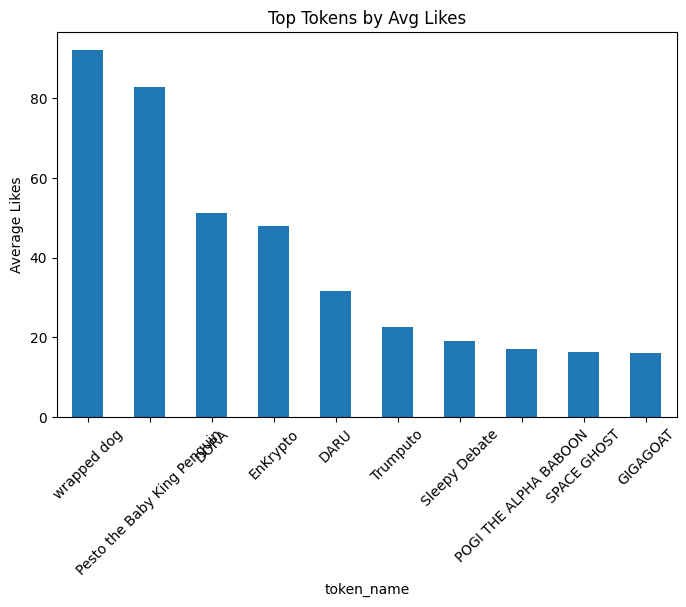

In [7]:
# --- Step 5: Bivariate Analysis ---
# Avg likes per token
avg_likes = comments_df.groupby('token_name')['likes'].mean().sort_values(ascending=False).head(10)
avg_likes.plot(kind='bar', title="Top Tokens by Avg Likes", figsize=(8,5))
plt.ylabel("Average Likes")
plt.xticks(rotation=45)
plt.show()

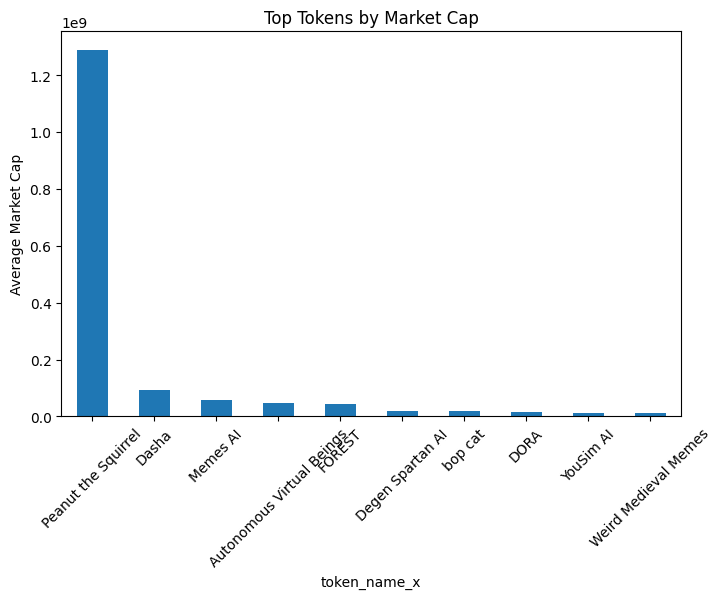

In [ ]:
# --- Step 6: Merge Datasets ---
merged_df = pd.merge(comments_df, finance_df, on='token_address', how='left')

# Market Cap of top mentioned tokens
top_mcap = merged_df[['token_name_x', 'mCap']].dropna().groupby('token_name_x').mean().sort_values('mCap', ascending=False).head(10)
top_mcap.plot(kind='bar', figsize=(8,5), legend=False)
plt.title("Top Tokens by Market Cap")
plt.ylabel("Average Market Cap")
plt.xticks(rotation=45)
plt.show()

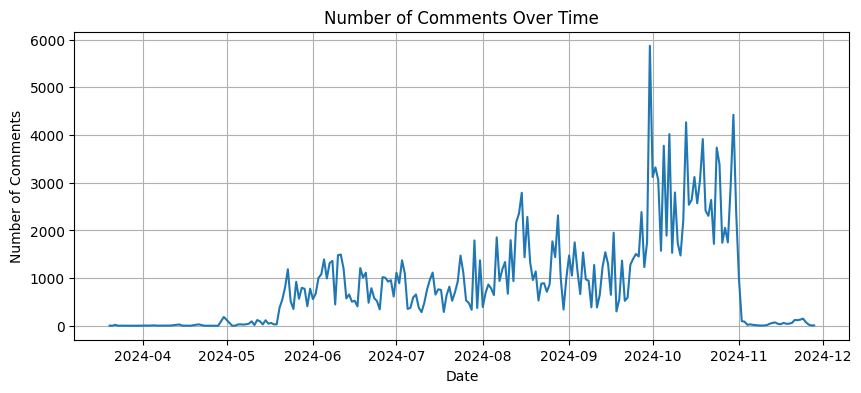

In [ ]:
# --- Step 7: Time Analysis ---
comments_df['day'] = comments_df['time_posted'].dt.date
daily_comments = comments_df.groupby('day').size()

plt.figure(figsize=(10,4))
daily_comments.plot()
plt.title("Number of Comments Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.grid(True)
plt.show()


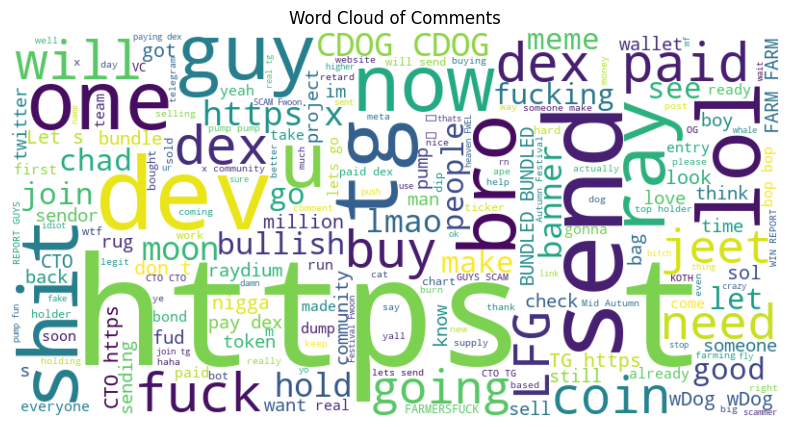

In [ ]:
# --- Step 8: Word Cloud from Comments ---
all_comments = ' '.join(comments_df['comment'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Comments From The Dataset")
plt.show()

In [ ]:
import pandas as pd
from transformers import pipeline

# Load the dataset
df = pd.read_csv("D:/NIT_Trichy Project/Sentiment_Analysis/cleaned_comments.csv")
df['comment'] = df['comment'].astype(str)
df = df.dropna(subset=['comment'])

# Initialize the BERT sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", framework="pt")
df['sentiment'] = df['comment'].apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])

# Save the output
df.to_csv("outputs/comments_with_sentiment.csv", index=False)

print("Sentiment analysis complete! Results saved to outputs/comments_with_sentiment.csv")